In [1339]:
import pandas as pd
import random as random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [1340]:
# Specify the path to your CSV file
csv_file_path = '../../data/00-raw-data/Brown_TestRelease_phenotypic.csv'

# Use the read_csv function to read the CSV file into a DataFrame
df1 = pd.read_csv(csv_file_path,encoding='latin1')

print(df1.head())

   ScanDir ID  Site Gender    Age Handedness  DX Secondary Dx  ADHD Measure  \
0       26001   2.0      1  16.92        usa   3       pending      pending   
1       26002   2.0      1  15.68          1   2       pending      pending   
2       26004   2.0      0  14.99          1   0       pending      pending   
3       26005   2.0      0  15.16          1   2       pending      pending   
4       26009   2.0      1  16.91          0   1       pending      pending   

   ADHD Index Inattentive Hyper/Impulsive  IQ Measure  Verbal IQ  \
0        43.0     pending         pending         NaN      133.0   
1        35.0     pending         pending         NaN      106.0   
2        43.0     pending         pending         NaN      119.0   
3        54.0     pending         pending         NaN      116.0   
4        44.0     pending         pending         NaN      113.0   

   Performance IQ Full2 IQ  Full4 IQ  
0           104.0      NaN     120.0  
1           106.0      NaN     107.0  

In [1341]:
#cleaning step-1
##TO REMOVE SPACES FROM COLUMN NAMES
df1.columns = df1.columns.str.strip()


In [1342]:
# Identify columns with mixed data types
#convert the object datatypes
#the datatypes are similar for dataframes too as its the similar data from various unis
print(df1.dtypes)

ScanDir ID           int64
Site               float64
Gender              object
Age                float64
Handedness          object
DX                   int64
Secondary Dx        object
ADHD Measure        object
ADHD Index         float64
Inattentive         object
Hyper/Impulsive     object
IQ Measure         float64
Verbal IQ          float64
Performance IQ     float64
Full2 IQ            object
Full4 IQ           float64
dtype: object


In [1343]:
#PC1 data collection site, gender, age, 
#handedness, Verbal IQ, Performance IQ, and Full 4 IQ. 
#(IQ Measure and Full 2 IQ) as well as different preprocessing of handedness data from the NeuroIMAGE site. 
#PCs2 included nine features: data collection site, gender, age, handedness, IQ Measure, Verbal IQ, Performance IQ, Full 2 IQ, and Full 4 IQ. 

#convert gender column to numeric.
df1['Gender'] = pd.to_numeric(df1['Gender'], errors='coerce')

#convert handedness column to numeric.
df1['Handedness'] = pd.to_numeric(df1['Handedness'], errors='coerce')

#convert Inattentive column to numeric.
df1['Inattentive'] = pd.to_numeric(df1['Inattentive'], errors='coerce')

#convert Hyper/Impulsive column to numeric.
df1['Hyper/Impulsive'] = pd.to_numeric(df1['Hyper/Impulsive'], errors='coerce')

#convert ADHD Measure column to numeric
df1['ADHD Measure'] = pd.to_numeric(df1['ADHD Measure'], errors='coerce')

#convert Full2 IQ column to numeric
df1['Full2 IQ'] = pd.to_numeric(df1['Full2 IQ'], errors='coerce')

#convert Secondary Dx column to numeric
df1['Secondary Dx'] = pd.to_numeric(df1['Secondary Dx'], errors='coerce')



In [1344]:
#Datatypes after proper formatting
print(df1.dtypes)

ScanDir ID           int64
Site               float64
Gender             float64
Age                float64
Handedness         float64
DX                   int64
Secondary Dx       float64
ADHD Measure       float64
ADHD Index         float64
Inattentive        float64
Hyper/Impulsive    float64
IQ Measure         float64
Verbal IQ          float64
Performance IQ     float64
Full2 IQ           float64
Full4 IQ           float64
dtype: object


In [1345]:
#standardising the columns
#REPLACE ALL CELLS THAT ARE ENTIRELY SPACE (OR EMPTY) WITH NAN 
#noticed spaces in df1, and df6
df1.replace(r'^\s*$', np.nan, regex=True, inplace=True)


In [1346]:
#check for duplicate rows
duplicates = df1.duplicated()
print(df1[duplicates])

Empty DataFrame
Columns: [ScanDir ID, Site, Gender, Age, Handedness, DX, Secondary Dx, ADHD Measure, ADHD Index, Inattentive, Hyper/Impulsive, IQ Measure, Verbal IQ, Performance IQ, Full2 IQ, Full4 IQ]
Index: []


In [1347]:
#we can see the spaces are replaced with Nan in df1
print(df1.head())

   ScanDir ID  Site  Gender    Age  Handedness  DX  Secondary Dx  \
0       26001   2.0     1.0  16.92         NaN   3           NaN   
1       26002   2.0     1.0  15.68         1.0   2           NaN   
2       26004   2.0     0.0  14.99         1.0   0           NaN   
3       26005   2.0     0.0  15.16         1.0   2           NaN   
4       26009   2.0     1.0  16.91         0.0   1           NaN   

   ADHD Measure  ADHD Index  Inattentive  Hyper/Impulsive  IQ Measure  \
0           NaN        43.0          NaN              NaN         NaN   
1           NaN        35.0          NaN              NaN         NaN   
2           NaN        43.0          NaN              NaN         NaN   
3           NaN        54.0          NaN              NaN         NaN   
4           NaN        44.0          NaN              NaN         NaN   

   Verbal IQ  Performance IQ  Full2 IQ  Full4 IQ  
0      133.0           104.0       NaN     120.0  
1      106.0           106.0       NaN     107.0  

In [1348]:
number_of_rows = df1.shape[0]
print("Number of rows:", number_of_rows)

Number of rows: 580


In [1349]:
# INSERT CODE TO COUNT THE NUMBER OF MISSING VALUES IN EACH COLUMN (use google)
# Count missing values in each column
missing_values = df1.isna().sum()

# Print the res697ult
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
ScanDir ID           0
Site                 3
Gender               2
Age                  0
Handedness           3
DX                   0
Secondary Dx       580
ADHD Measure        60
ADHD Index         113
Inattentive         60
Hyper/Impulsive     60
IQ Measure          26
Verbal IQ          113
Performance IQ     113
Full2 IQ           529
Full4 IQ             0
dtype: int64


There are totally 580 rows. we can see there are 529 missing values in Full2 IQ and 454 missing values in Secondary Dx. we can remove them as its a lot of missing values, about 80% or more. On top of it these variables are very important for our predictions

In [1350]:
df1 = df1.drop('Secondary Dx', axis=1)
df1 = df1.drop('Full2 IQ', axis=1)
df1 = df1.drop('ScanDir ID', axis=1)
df1 = df1.drop('ADHD Measure', axis=1)

In [1351]:
#remove the rows with missing values in gender and handedness as its only few rows
df1 = df1.dropna(subset=['Gender'])
df1 = df1.dropna(subset=['Handedness'])
df1 = df1.dropna(subset=['Site'])

In [1352]:
df1.columns

Index(['Site', 'Gender', 'Age', 'Handedness', 'DX', 'ADHD Index',
       'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ',
       'Performance IQ', 'Full4 IQ'],
      dtype='object')

Fill missing values in all columns with column means, median or mode according to the variable type and distribution

continous variables that have missing values
ADHD Index
Inattentive         60
Hyper/Impulsive     60
IQ Measure          26
Verbal IQ          113
Performance IQ     113

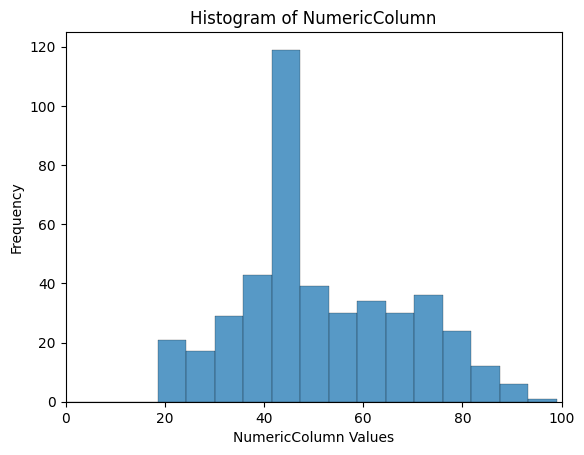

In [1353]:
# Specify the number of bins

# Create a histogram
# Uncomment this section if using Seaborn
sns.histplot(df1['ADHD Index'], bins='auto')
plt.title('Histogram of NumericColumn')
plt.xlim([0, 100])
plt.xlabel('NumericColumn Values')
plt.xticks([0, 20, 40, 60, 80, 100])
plt.ylabel('Frequency')
plt.show()




In [1354]:
#p value is 1 indicating that the data is normally distributed
shapiro_test = stats.shapiro(df1['ADHD Index'])
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test p-value: 1.0


In [1355]:
# Calculate the median of the column
median_adhd_index = df1['ADHD Index'].mean()

# Replace missing (NaN) values or a specific value with the median as ADHD Index distribution is skewed.
df1['ADHD Index'].fillna(median_adhd_index, inplace=True)


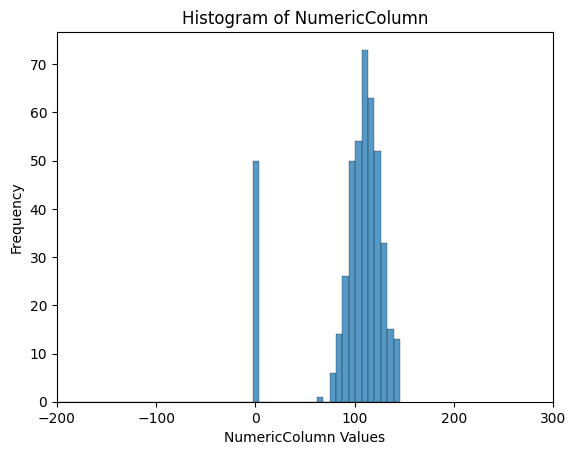

In [1356]:
# Create a histogram
# Uncomment this section if using Seaborn
sns.histplot(df1['Verbal IQ'], bins='auto')
plt.title('Histogram of NumericColumn')
plt.xlim([-200, 300])
plt.xlabel('NumericColumn Values')
#plt.xticks([0, 20, 40, 60, 80, 100])
plt.ylabel('Frequency')
plt.show()


In [1357]:
# Calculate the median of the column
mean_verbal_iq = df1['Verbal IQ'].mean()

# Replace missing (NaN) values or a specific value with the mean_verbal_iq.
df1['Verbal IQ'].fillna(mean_verbal_iq, inplace=True)


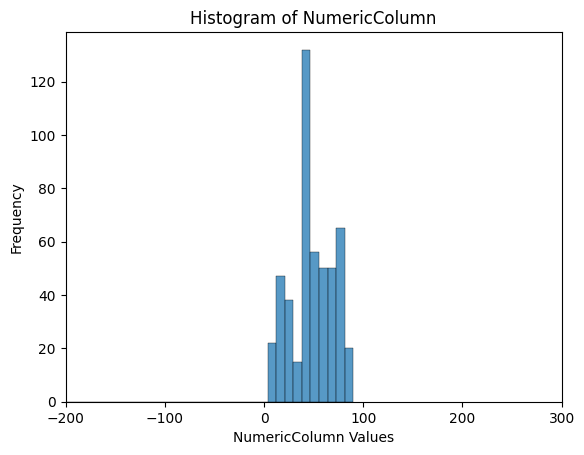

In [1358]:
# Create a histogram
# Uncomment this section if using Seaborn
sns.histplot(df1['Inattentive'], bins='auto')
plt.title('Histogram of NumericColumn')
plt.xlim([-200, 300])
plt.xlabel('NumericColumn Values')
#plt.xticks([0, 20, 40, 60, 80, 100])
plt.ylabel('Frequency')
plt.show()


In [1359]:
#p value from this test is high, indicating that the data is normally distributed
shapiro_test = stats.shapiro(df1['Inattentive'])
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)


Shapiro-Wilk Test p-value: 1.0


In [1360]:
# Calculate the median of the column
mean_inattentive = df1['Inattentive'].mean()

# Replace missing (NaN) values or a specific value with the mean.
df1['Inattentive'].fillna(mean_inattentive, inplace=True)


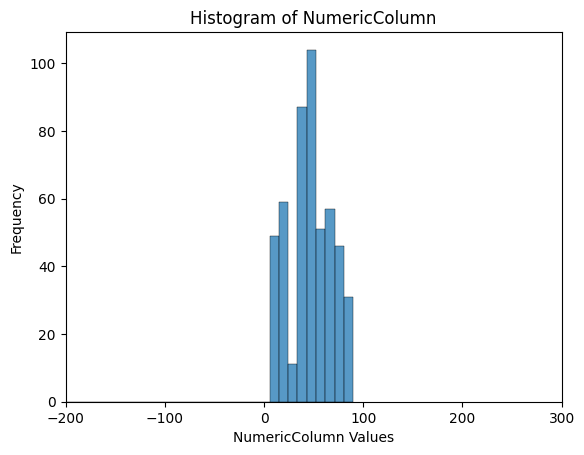

In [1361]:
# Create a histogram
# Uncomment this section if using Seaborn
sns.histplot(df1['Hyper/Impulsive'], bins='auto')
plt.title('Histogram of NumericColumn')
plt.xlim([-200, 300])
plt.xlabel('NumericColumn Values')
#plt.xticks([0, 20, 40, 60, 80, 100])
plt.ylabel('Frequency')
plt.show()

In [1362]:
#p value from this test is high, indicating that the data is normally distributed
shapiro_test = stats.shapiro(df1['Hyper/Impulsive'])
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test p-value: 1.0


In [1363]:
# Calculate the median of the column
mean_impulsive = df1['Hyper/Impulsive'].mean()

# Replace missing (NaN) values or a specific value with the mean.
df1['Hyper/Impulsive'].fillna(mean_impulsive, inplace=True)


In [1364]:
# Calculate the median of the column
mean_iq = df1['IQ Measure'].mean()

# Replace missing (NaN) values or a specific value with the mean.
df1['IQ Measure'].fillna(mean_iq, inplace=True)


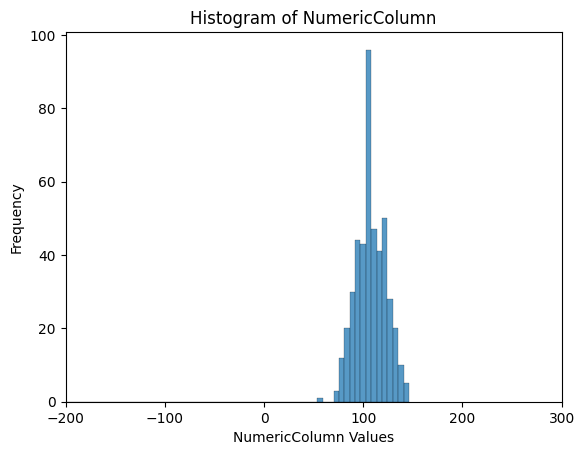

In [1365]:
sns.histplot(df1['Performance IQ'], bins='auto')
plt.title('Histogram of NumericColumn')
plt.xlim([-200, 300])
plt.xlabel('NumericColumn Values')
#plt.xticks([0, 20, 40, 60, 80, 100])
plt.ylabel('Frequency')
plt.show()

In [1366]:
# Calculate the median of the column
mean_performance_iq = df1['Performance IQ'].mean()

# Replace missing (NaN) values or a specific value with the median as ADHD Index distribution is skewed.
df1['Performance IQ'].fillna(mean_performance_iq, inplace=True)


In [1367]:
# INSERT CODE TO COUNT THE NUMBER OF MISSING VALUES IN EACH COLUMN (use google)
# Count missing values in each column
missing_values = df1.isna().sum()

# Print the result
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
Site               0
Gender             0
Age                0
Handedness         0
DX                 0
ADHD Index         0
Inattentive        0
Hyper/Impulsive    0
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full4 IQ           0
dtype: int64


In [1368]:
print(df1.describe())

             Site      Gender         Age  Handedness          DX  ADHD Index  \
count  573.000000  573.000000  573.000000  573.000000  573.000000  573.000000   
mean     3.844677    0.558464   10.910070   -9.624520    0.806283    8.066304   
std      1.894589    0.497004    2.534535  101.865249    1.109004  188.029098   
min      1.000000    0.000000    7.170000 -999.000000    0.000000 -999.000000   
25%      2.000000    0.000000    8.920000    0.750000    0.000000   22.000000   
50%      5.000000    1.000000   10.330000    1.000000    0.000000   42.000000   
75%      5.000000    1.000000   12.330000    1.000000    1.000000   58.000000   
max      6.000000    1.000000   17.960000    2.000000    3.000000   99.000000   

       Inattentive  Hyper/Impulsive  IQ Measure   Verbal IQ  Performance IQ  \
count   573.000000       573.000000  573.000000  573.000000      573.000000   
mean      9.948444         8.638132    0.100365   75.571739       83.647826   
std     188.399221       188.2257

In [1369]:
print(df1.shape[0])

573


In [1370]:


def count_outliers(data):
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            print(f"{column}: {len(outliers)} outliers")

# Example usage:
# df = pd.DataFrame({your_data})
count_outliers(df1)


Site: 0 outliers
Gender: 0 outliers
Age: 10 outliers
Handedness: 54 outliers
DX: 97 outliers
ADHD Index: 19 outliers
Inattentive: 19 outliers
Hyper/Impulsive: 19 outliers
IQ Measure: 1 outliers
Verbal IQ: 60 outliers
Performance IQ: 10 outliers
Full4 IQ: 60 outliers


Verbal IQ generally has values between 114 and 180, but the values below are very erroneous, which must be replaced.

In [1371]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[column]  # Return only the specified column of outliers

# Applying the function to the 'values' column
outliers_in_verbal_iq = find_outliers_iqr(df1, 'Verbal IQ')

# Print the outliers from 'values' column
print("Outliers in 'values' column:\n", outliers_in_verbal_iq)


Outliers in 'values' column:
 204   -999.0
230   -999.0
234   -999.0
246   -999.0
267   -999.0
268   -999.0
281   -999.0
291   -999.0
301   -999.0
328   -999.0
529      3.0
530      3.0
531      3.0
532      3.0
533      3.0
534      3.0
535      3.0
536      3.0
537      3.0
538      3.0
539      3.0
540      3.0
541      3.0
542      3.0
543      3.0
544      3.0
545      3.0
546      3.0
547      3.0
548      3.0
549      3.0
550      3.0
551      3.0
552      3.0
553      3.0
554      3.0
555      3.0
556      3.0
557      3.0
558      3.0
559      3.0
560      3.0
561      3.0
562      3.0
563      3.0
564      3.0
565      3.0
566      3.0
567      3.0
568      3.0
569      3.0
570      3.0
571      3.0
572      3.0
574      3.0
575      3.0
576      3.0
577      3.0
578      3.0
579      3.0
Name: Verbal IQ, dtype: float64


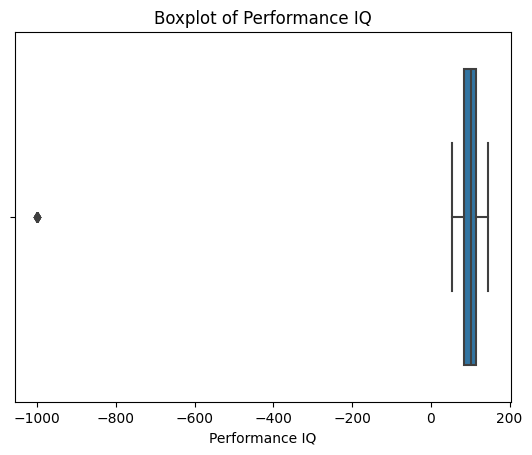

In [1372]:
# Create a boxplot to identify outliers

# dots represent outliers
sns.boxplot(x=df1['Performance IQ'])
# dots represent outliers

# Set the title
plt.title('Boxplot of Performance IQ')

# Show the boxplot
plt.show()

In [1373]:
outliers_in_performace_iq = find_outliers_iqr(df1, 'Performance IQ')
print(outliers_in_performace_iq)

204   -999.0
230   -999.0
234   -999.0
246   -999.0
267   -999.0
268   -999.0
281   -999.0
291   -999.0
301   -999.0
328   -999.0
Name: Performance IQ, dtype: float64


These above values in performace IQ are erroneous values that can be removed. Since they are clearly wrong, they wont provide any insights.

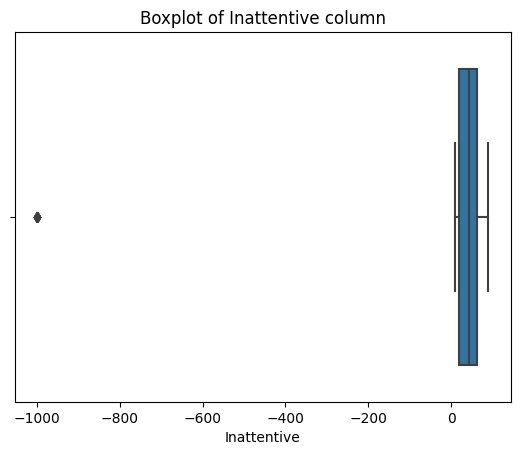

In [1374]:
sns.boxplot(x=df1['Inattentive'])
# dots represent outliers

# Set the title
plt.title('Boxplot of Inattentive column')

# Show the boxplot
plt.show()

In [1375]:
def replace_outliers_with_nan(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = np.nan
    return df

# Applying the function to each column
for col in df1.columns:
    df1 = replace_outliers_with_nan(df1, col)

In [1376]:
missing_values = df1.isna().sum()

# Print the res697ult
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
Site                0
Gender              0
Age                10
Handedness         54
DX                 97
ADHD Index         19
Inattentive        19
Hyper/Impulsive    19
IQ Measure          1
Verbal IQ          60
Performance IQ     10
Full4 IQ           60
dtype: int64


In [1377]:
# Replace missing (NaN) values or a specific value with the median as ADHD Index distribution is skewed.
df1['Performance IQ'].fillna(df1['Performance IQ'].mean(), inplace=True)
df1['Age'].fillna(df1['Age'].mean(), inplace=True)
df1['Handedness'].fillna(df1['Handedness'].mode(), inplace=True)
df1['DX'].fillna(df1['DX'].mode(), inplace=True)
df1['ADHD Index'].fillna(df1['ADHD Index'].mean(), inplace=True)
df1['Inattentive'].fillna(df1['Inattentive'].mean(), inplace=True)
df1['Hyper/Impulsive'].fillna(df1['Hyper/Impulsive'].mean(), inplace=True)
df1['Verbal IQ'].fillna(df1['Verbal IQ'].mean(), inplace=True)
df1['Full4 IQ'].fillna(df1['Full4 IQ'].mean(), inplace=True)

In [1378]:
print(df1.head())

   Site  Gender    Age  Handedness   DX  ADHD Index  Inattentive  \
1   2.0     1.0  15.68         1.0  2.0        35.0     9.948444   
2   2.0     0.0  14.99         1.0  0.0        43.0     9.948444   
3   2.0     0.0  15.16         1.0  2.0        54.0     9.948444   
4   2.0     1.0  16.91         NaN  1.0        44.0     9.948444   
5   2.0     0.0  16.21         1.0  0.0        43.0     9.948444   

   Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  
1         8.638132    0.100365      106.0           106.0     107.0  
2         8.638132    0.100365      119.0           123.0     125.0  
3         8.638132    0.100365      116.0           131.0     126.0  
4         8.638132    0.100365      113.0            81.0      97.0  
5         8.638132    0.100365      101.0           102.0     102.0  


In [1379]:
#the final cleaned dataset
print(df1.head())

   Site  Gender    Age  Handedness   DX  ADHD Index  Inattentive  \
1   2.0     1.0  15.68         1.0  2.0        35.0     9.948444   
2   2.0     0.0  14.99         1.0  0.0        43.0     9.948444   
3   2.0     0.0  15.16         1.0  2.0        54.0     9.948444   
4   2.0     1.0  16.91         NaN  1.0        44.0     9.948444   
5   2.0     0.0  16.21         1.0  0.0        43.0     9.948444   

   Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  
1         8.638132    0.100365      106.0           106.0     107.0  
2         8.638132    0.100365      119.0           123.0     125.0  
3         8.638132    0.100365      116.0           131.0     126.0  
4         8.638132    0.100365      113.0            81.0      97.0  
5         8.638132    0.100365      101.0           102.0     102.0  


In [1380]:
df1.columns

Index(['Site', 'Gender', 'Age', 'Handedness', 'DX', 'ADHD Index',
       'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ',
       'Performance IQ', 'Full4 IQ'],
      dtype='object')

In [1381]:
count_outliers(df1)

Site: 0 outliers
Gender: 0 outliers
Age: 9 outliers
Handedness: 64 outliers
DX: 0 outliers
ADHD Index: 0 outliers
Inattentive: 0 outliers
Hyper/Impulsive: 0 outliers
IQ Measure: 0 outliers
Verbal IQ: 0 outliers
Performance IQ: 0 outliers
Full4 IQ: 1 outliers


In [1382]:
import pandas as pd

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

clean_df = remove_outliers(clean_df, 'Handedness')
df1 = clean_df

In [1383]:
count_outliers(clean_df)

Site: 0 outliers
Gender: 0 outliers
Age: 1 outliers
Handedness: 0 outliers
DX: 0 outliers
ADHD Index: 0 outliers
Inattentive: 0 outliers
Hyper/Impulsive: 0 outliers
IQ Measure: 0 outliers
Verbal IQ: 0 outliers
Performance IQ: 0 outliers
Full4 IQ: 0 outliers


In [1384]:
df1.isna().sum()

Site                0
Gender              0
Age                 0
Handedness          0
DX                 54
ADHD Index          0
Inattentive         0
Hyper/Impulsive     0
IQ Measure          0
Verbal IQ           0
Performance IQ      0
Full4 IQ            0
dtype: int64

In [1385]:
df1.to_csv('../../data/01-modified-data/combined_data_clean00.csv', index=False)